# K-Means Elbow Method Clustering and Silhouette Analysis with Yellowbrick and Scikit-Learn

 K-Means clustering is one of the most widely used unsupervised machine learning algorithms that form clusters of data based on the similarity between data instances. The most commonly used techniques for choosing the number of Ks are the Elbow Method and the Silhouette Analysis.

#### TODO - From given 'iris' dataset predict the optimum number of clusters, and represent it visually.

#### Contents :-
#### -  Import Libraries
#### - Data preparation and cleaning
#### - Data Visualisation
#### - Find the optimum number of clusters for K Means
#### - Visual Representation

### Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
#load dataset
iris=pd.read_csv('Iris dataset.csv')
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data preparation and cleaning

In [3]:
iris.shape

(150, 6)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Checking missing values

In [6]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Checking duplicates

In [7]:
data = iris.drop_duplicates(subset ="Species",)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


We can see that there are only three unique species

#### Let’s see if the dataset is balanced or not i.e. all the species contain equal amounts of rows or not.

In [8]:
iris.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#### We can see that all the species contain an equal amount of rows, so we should not delete any entries.

### Data Visualization

#### Visualizing the target column
Our target column will be the Species column because at the end we will need the result according to the species only.

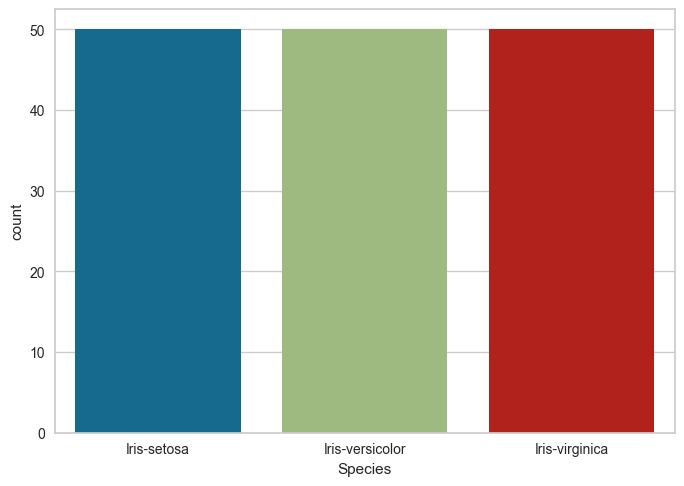

In [9]:
sns.countplot(x='Species', data=iris, )
plt.show()

<AxesSubplot:>

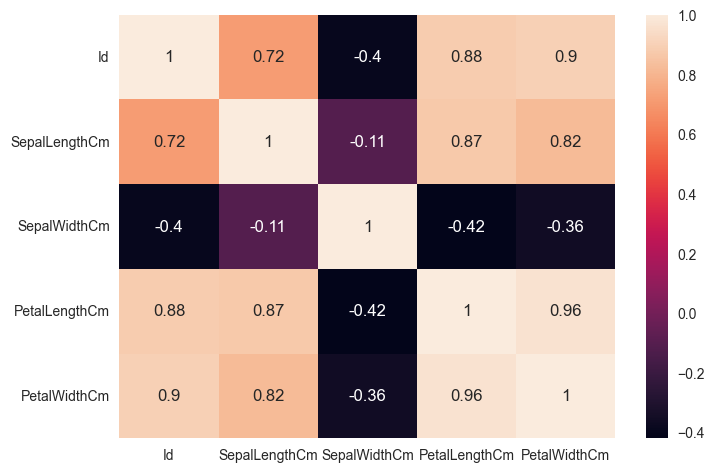

In [10]:
#finding correlation of features 
correl=iris.corr()
sns.heatmap(correl,annot=True)

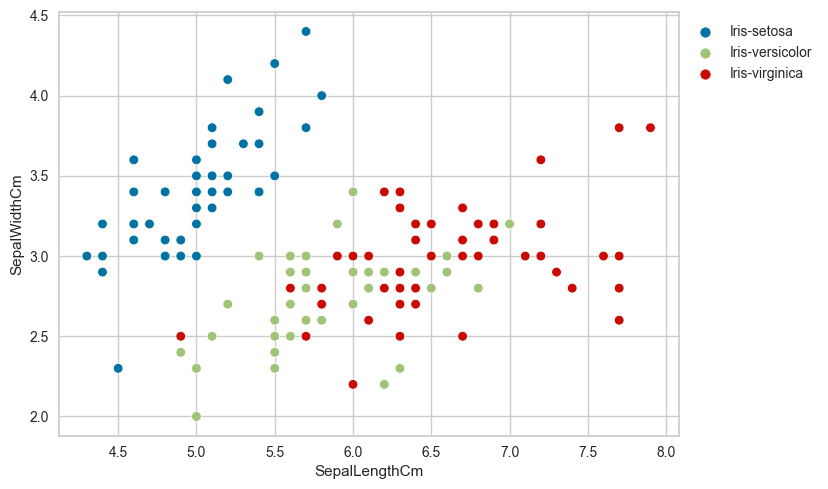

In [11]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=iris, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

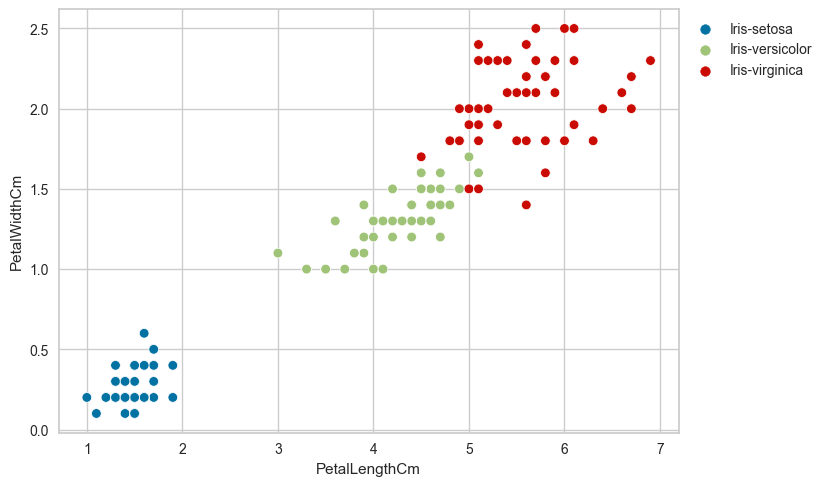

In [12]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=iris, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

### Label Encoding
We perform label encoding for converting the categorical feature ‘Species’ into a numerical one. 

In [13]:
#Label Encoding - for encoding categorical features into numerical ones
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
iris['Species'] = encoder.fit_transform(iris['Species'])

In [14]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [15]:
#finding different class labels 
np.unique(iris['Species'])

array([0, 1, 2])

In [16]:
#DROPPING ID, irrelevant data
iris= iris.drop(['Id'], axis = 1)

In [17]:
iris.shape

(150, 5)

### Find the optimum number of clusters for K Means

We create a KMeans model, a KElbowVisualizer() instance which will receive that model along with the number of k's for which a metric will be computed, in this case from 2 to 11 Ks. We are using the Elbow Method to choose the number of Ks. Plotting the K's along with the WCSS (The smaller the WCSS is, the closer our points are, therefore we have a more well-formed cluster).

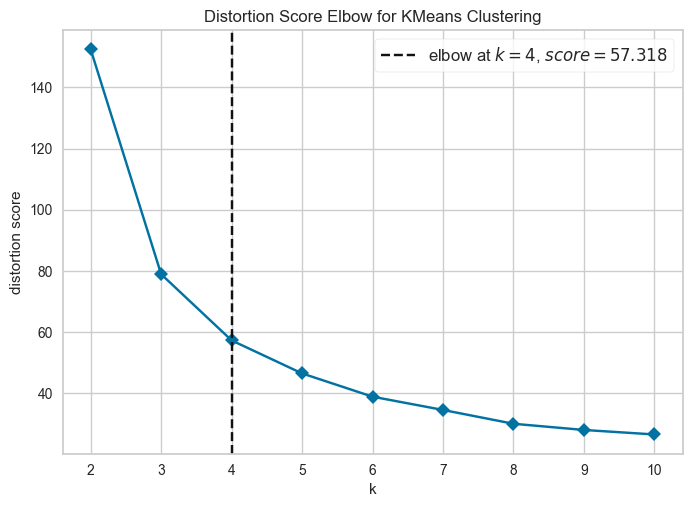

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
model = KMeans(random_state=42)

X = iris.iloc[:, [0, 1, 2, 3]].values

elb_visualizer = KElbowVisualizer(model, k=(2,11),timings=False)
elb_visualizer.fit(X)    
elb_visualizer.show()

Now, we have a Distortion Score Elbow for KMeans Clustering plot with a vertical line marking which would be the best number of ks, in this case, 4.

Seems the Elbow Method with a distortion metric wasn't the best choice, since we know their are 3 clusters in this dataset.
Further, let us visualize using Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers to see if scores are same for them.

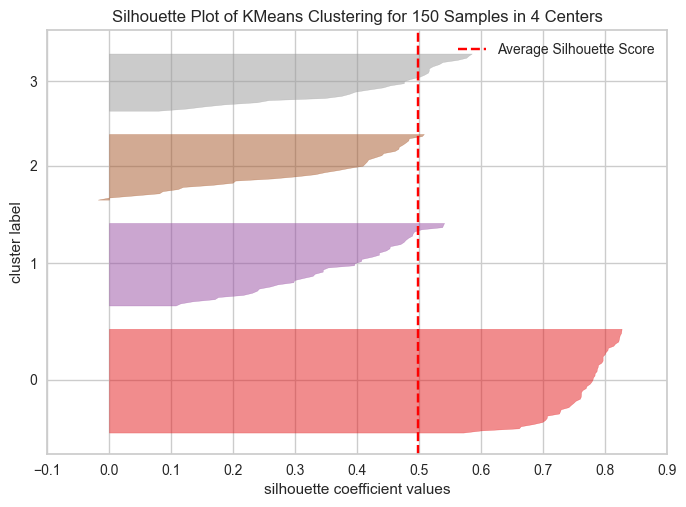

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
model_4clust = KMeans(n_clusters = 4, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X)    
sil_visualizer.show()

To analyze we look at the value of the silhouette coefficient (or score), its best value is closer to 1. The average value we have is 0.5, marked by the vertical line, and not so good.

Let's repeat the same plot for 3 clusters to see what happens

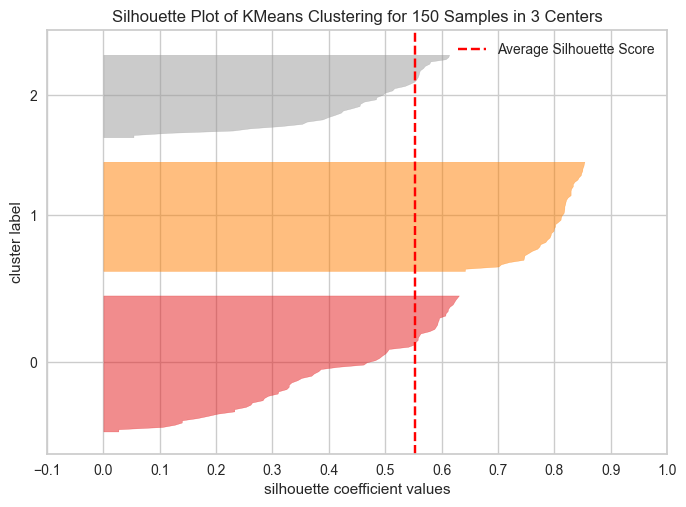

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
model_3clust = KMeans(n_clusters = 3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_3clust)
sil_visualizer.fit(X)    
sil_visualizer.show()

### Visual Representation

#### By changing the number of clusters, the silhouette score got 0.05 higher and the clusters are more balanced. 
#### *From this we choose the number of clusters as 3.

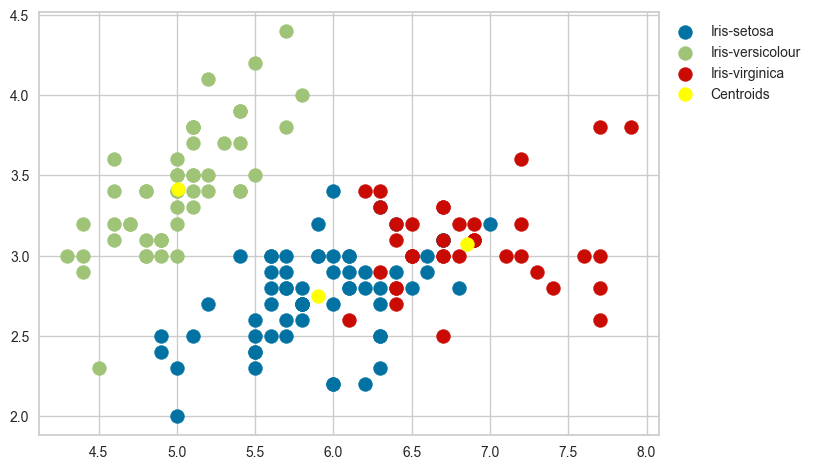

In [21]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

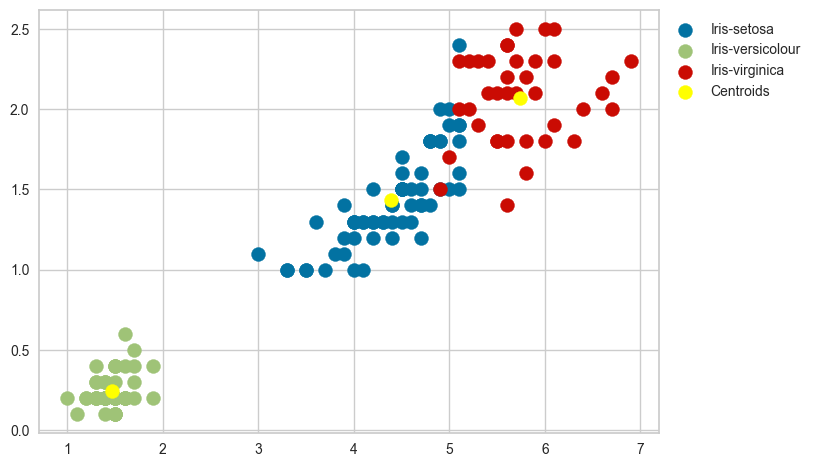

In [22]:
# Visualising the clusters - On the last two columns
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], 
            s = 100, label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], 
            s = 100, label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3],
            s = 100, label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

Thus, from above plot we can see the centroids of optimum clusters where K is 3.